In [1]:
import numpy as np
import jsonlines
import json
import matplotlib.pyplot as plt
import pandas as pd

Matplotlib created a temporary config/cache directory at /localscratch-ssd/287512/matplotlib-c3o97658 because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
import matplotlib

def global_settings():
    pgf_with_latex = {                      # setup matplotlib to use latex for output
        # "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
        # "text.usetex": True,                # use LaTeX to write all text
        # "figure.figsize": (9, 5),     # default fig size of 0.9 textwidth
        # "figure.dpi": 300,
        "font.family": "serif",
        # "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
        # "font.sans-serif": [],
        # "font.monospace": [],
        "axes.labelsize": 20,               # LaTeX default is 10pt font.
        'axes.titlesize': 15,
        "font.size": 15,
        "legend.fontsize": 20,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
#         "pgf.preamble": [
#             r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
#             r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
#             ]
        }

    matplotlib.rcParams.update(pgf_with_latex)
global_settings()

# import matplotlib
# matplotlib.rcParams.update({"font.family": "serif"})

In [3]:
MODEL_NAMES = ['gpt-4v',
               'gpt-4o',
               'llava-v1.5-7b',
               'llava-v1.5-13b',
               'cogvlm-chat',
               'blip-flan-xl',
               'blip-flan-xxl',
               'minigpt4-vicuna-7B',
               'minigpt4-vicuna-13B',
               'instruct-flant5xl',
               'instruct-flant5xxl',
               'instruct-vicuna7b',
               'instruct-vicuna13b']

# Customizing the color list for better aesthetics
COLORLIST = ['#2ca02c', 'salmon','darkviolet', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [4]:
def classification_table(filename, model_lists=MODEL_NAMES, full_display=False):

    # Initialize empty lists to store data
    model_list = []
    # trait_list = []
    correct_count_list = []
#     correct_ge_count_list = []
    incorrect_count_list = []
    NA_list = []
    
    # Read the JSON lines file line by line
    with open(filename, 'r') as file:
        for line in file:
            data = json.loads(line)
            if data['Model'] not in model_lists:
                continue
            model_list.append(data['Model'])
            correct_count_list.append('{:.2f}'.format(data['correct_count']))
#             correct_ge_count_list.append('{:.2f}'.format(data['correct_ge_count']))
            incorrect_count_list.append('{:.2f}'.format(data['incorrect_count']))
            NA_list.append('{:.2f}'.format(data['NA_count']))
    
    # Create a DataFrame
    df = pd.DataFrame({
        'Models': model_list,
        'Correct(%)': np.array(correct_count_list).astype(float),
#         'Genus-correct(%)': np.array(correct_ge_count_list).astype(float),
        'Incorrect(%)': np.array(incorrect_count_list).astype(float),
        'Other(%)': np.array(NA_list).astype(float),
    })
    
    # Display the DataFrame
    if full_display:
        display(df)

    return df

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Butterfly

<Figure size 960x720 with 0 Axes>

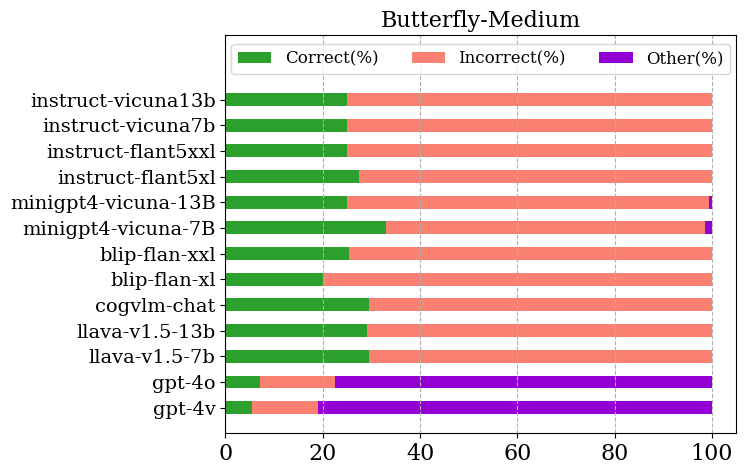

In [6]:
# fish direct open

filename = './tables/classification_butterfly-medium_selection_butterfly.jsonl'
df_direct_fish = classification_table(filename, model_lists=MODEL_NAMES, full_display=False)

# Creating the plot with enhanced formatting
plt.figure(dpi=150)  # Adjust the size as needed
df_direct_fish.plot(x='Models', kind='barh', stacked=True, color=COLORLIST,
                    title='Error Distribution: Fish-Open', figsize=(8, 5))

plt.ylim([-1, 14.5])
plt.legend(loc="upper center", ncol=3, fontsize=12) #, bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True,
plt.xlabel('', fontsize=14)  # Assuming the Y-axis represents some form of error value
plt.ylabel('', fontsize=14)
plt.title('Butterfly-Medium', fontsize=16) #, fontweight='bold'
plt.tight_layout()  # Adjust the layout to make room for the legend

# Enhancing the overall aesthetics
plt.gca().xaxis.grid(True, linestyle='--')  # Adding grid lines for readability
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.savefig('./plots/butterfly_medium.png', bbox_inches='tight', dpi=100)
plt.show()


<Figure size 960x720 with 0 Axes>

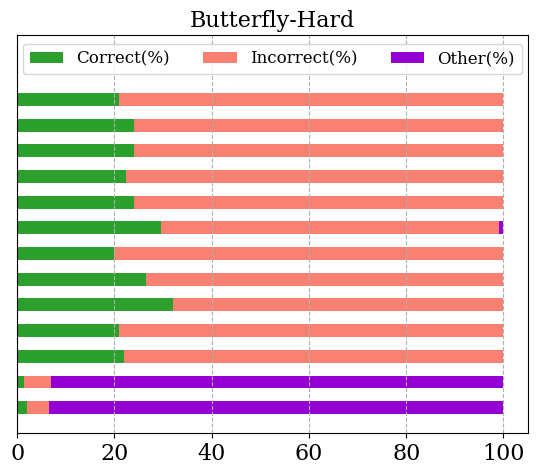

In [7]:
# fish direct open

filename = './tables/classification_butterfly-hard_selection_butterfly.jsonl'
df_direct_fish = classification_table(filename, model_lists=MODEL_NAMES, full_display=False)

# Creating the plot with enhanced formatting
plt.figure(dpi=150)  # Adjust the size as needed
df_direct_fish.plot(x='Models', kind='barh', stacked=True, color=COLORLIST,
                    title='Error Distribution: Fish-Open', figsize=(8, 5))

plt.ylim([-1, 14.5])
plt.legend(loc="upper center", ncol=3, fontsize=12) #, bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True,
plt.xlabel('', fontsize=14)  # Assuming the Y-axis represents some form of error value
plt.ylabel('', fontsize=14)
plt.title('Butterfly-Hard', fontsize=16) #, fontweight='bold'
plt.tight_layout()  # Adjust the layout to make room for the legend

# Enhancing the overall aesthetics
plt.gca().xaxis.grid(True, linestyle='--')  # Adding grid lines for readability
plt.xticks(fontsize=16)
plt.yticks([], fontsize=14)
plt.savefig('./plots/butterfly_hard.png', bbox_inches='tight', dpi=100)
plt.show()

### Bird

<Figure size 960x720 with 0 Axes>

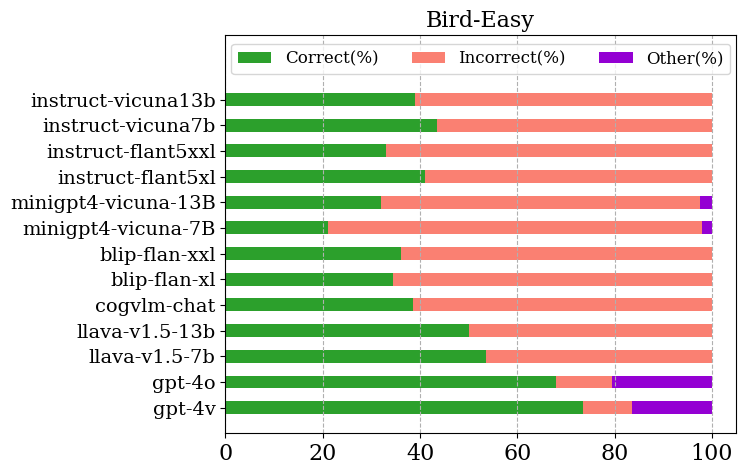

In [10]:
# fish direct open

filename = './tables/classification_bird-easy_selection_bird.jsonl'
df_direct_fish = classification_table(filename, model_lists=MODEL_NAMES, full_display=False)

# Creating the plot with enhanced formatting
plt.figure(dpi=150)  # Adjust the size as needed
df_direct_fish.plot(x='Models', kind='barh', stacked=True, color=COLORLIST,
                    title='Error Distribution: Fish-Open', figsize=(8, 5))

plt.ylim([-1, 14.5])
plt.legend(loc="upper center", ncol=3, fontsize=12) #, bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True,
plt.xlabel('', fontsize=14)  # Assuming the Y-axis represents some form of error value
plt.ylabel('', fontsize=14)
plt.title('Bird-Easy', fontsize=16) #, fontweight='bold'
plt.tight_layout()  # Adjust the layout to make room for the legend

# Enhancing the overall aesthetics
plt.gca().xaxis.grid(True, linestyle='--')  # Adding grid lines for readability
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.savefig('./plots/bird_easy.png', bbox_inches='tight', dpi=100)
plt.show()

<Figure size 960x720 with 0 Axes>

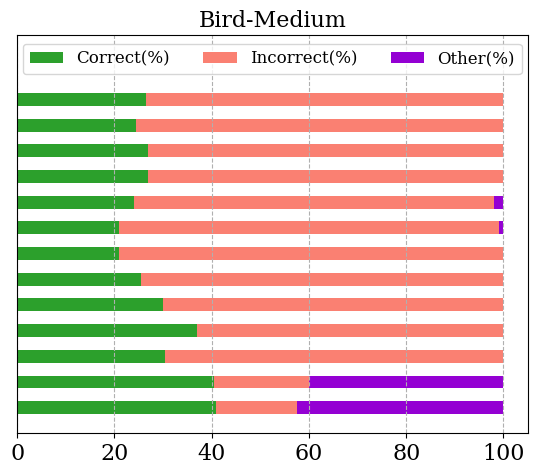

In [13]:
# fish direct open

filename = './tables/classification_bird-medium_selection_bird.jsonl'
df_direct_fish = classification_table(filename, model_lists=MODEL_NAMES, full_display=False)

# Creating the plot with enhanced formatting
plt.figure(dpi=150)  # Adjust the size as needed
df_direct_fish.plot(x='Models', kind='barh', stacked=True, color=COLORLIST,
                    title='Error Distribution: Fish-Open', figsize=(8, 5))

plt.ylim([-1, 14.5])
plt.legend(loc="upper center", ncol=3, fontsize=12) #, bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True,
plt.xlabel('', fontsize=14)  # Assuming the Y-axis represents some form of error value
plt.ylabel('', fontsize=14)
plt.title('Bird-Medium', fontsize=16) #, fontweight='bold'
plt.tight_layout()  # Adjust the layout to make room for the legend

# Enhancing the overall aesthetics
plt.gca().xaxis.grid(True, linestyle='--')  # Adding grid lines for readability
plt.xticks(fontsize=16)
plt.yticks([], fontsize=14)
plt.savefig('./plots/bird_medium.png', bbox_inches='tight', dpi=100)
plt.show()

### Fish

<Figure size 960x720 with 0 Axes>

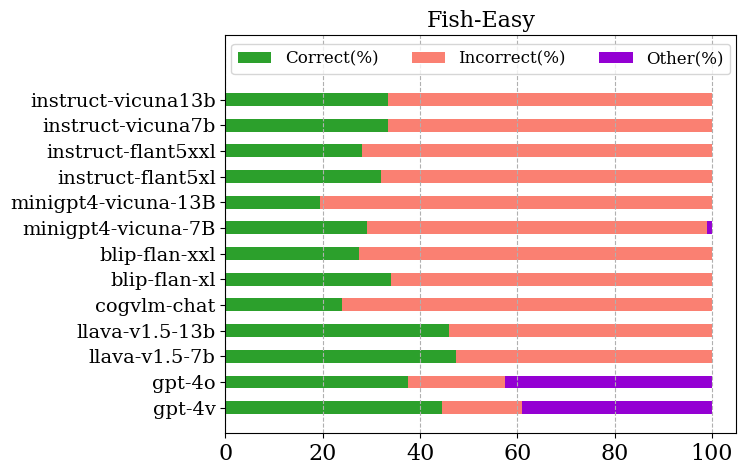

In [12]:
# fish direct open

filename = './tables/classification_fish-easy_selection_fish.jsonl'
df_direct_fish = classification_table(filename, model_lists=MODEL_NAMES, full_display=False)

# Creating the plot with enhanced formatting
plt.figure(dpi=150)  # Adjust the size as needed
df_direct_fish.plot(x='Models', kind='barh', stacked=True, color=COLORLIST,
                    title='Error Distribution: Fish-Open', figsize=(8, 5))

plt.ylim([-1, 14.5])
plt.legend(loc="upper center", ncol=3, fontsize=12) #, bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True,
plt.xlabel('', fontsize=14)  # Assuming the Y-axis represents some form of error value
plt.ylabel('', fontsize=14)
plt.title('Fish-Easy', fontsize=16) #, fontweight='bold'
plt.tight_layout()  # Adjust the layout to make room for the legend

# Enhancing the overall aesthetics
plt.gca().xaxis.grid(True, linestyle='--')  # Adding grid lines for readability
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.savefig('./plots/fish_easy.png', bbox_inches='tight', dpi=100)
plt.show()

<Figure size 960x720 with 0 Axes>

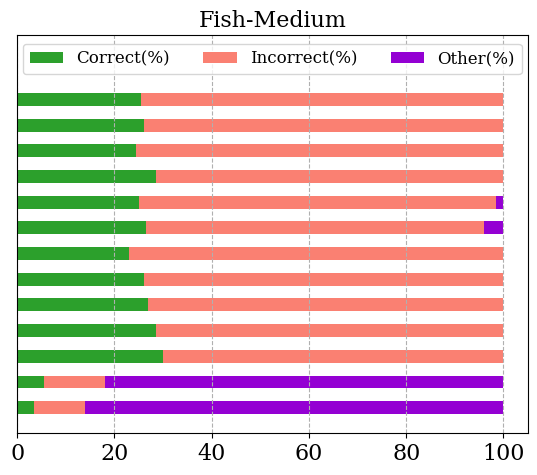

In [14]:
# fish direct open

filename = './tables/classification_fish-medium_selection_fish.jsonl'
df_direct_fish = classification_table(filename, model_lists=MODEL_NAMES, full_display=False)

# Creating the plot with enhanced formatting
plt.figure(dpi=150)  # Adjust the size as needed
df_direct_fish.plot(x='Models', kind='barh', stacked=True, color=COLORLIST,
                    title='Error Distribution: Fish-Open', figsize=(8, 5))

plt.ylim([-1, 14.5])
plt.legend(loc="upper center", ncol=3, fontsize=12) #, bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True,
plt.xlabel('', fontsize=14)  # Assuming the Y-axis represents some form of error value
plt.ylabel('', fontsize=14)
plt.title('Fish-Medium', fontsize=16) #, fontweight='bold'
plt.tight_layout()  # Adjust the layout to make room for the legend

# Enhancing the overall aesthetics
plt.gca().xaxis.grid(True, linestyle='--')  # Adding grid lines for readability
plt.xticks(fontsize=16)
plt.yticks([], fontsize=14)
plt.savefig('./plots/fish_medium.png', bbox_inches='tight', dpi=100)
plt.show()